Importing the necessary libraries for the script. TensorFlow is the primary library used for building and training neural networks. Keras is a high-level API that simplifies building neural networks in TensorFlow. NumPy provides numerical computing tools for handling arrays and matrices. Matplotlib is a plotting library for visualizing data. Scikit-learn is a machine learning library containing various tools for preprocessing and modeling data. Pandas is a library for data manipulation and analysis. Random is a library for generating random numbers.

In [1]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard

In [3]:
import pandas as pd
import random

# Loading Dataset


MNIST stands for “Modified National Institute of Standards and Technology”. It is a dataset of 70,000 handwritten images. Each image is of 28x28 pixels i.e. about 784 features. Each feature represents only one pixel’s intensity i.e. from 0(white) to 255(black).

In [59]:
# load the dataset using the builtin Keras method
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Dimensionality of the training image dataset and labels:')
print(X_train.shape)
print(y_train.shape)

#These lines print the dimensionality (i.e., shape) of the image datasets and their corresponding labels. The training set contains 60,000 images of size 28x28, 
#and the test set contains 10,000 images of the same size. The labels are 1D arrays containing integers from 0 to 9.


print('Dimensionality of the test image dataset and labels:')
print(X_test.shape)
print(y_test.shape)

Dimensionality of the training image dataset and labels:
(60000, 28, 28)
(60000,)
Dimensionality of the test image dataset and labels:
(10000, 28, 28)
(10000,)


Ploting Images from 20-40

Labels of the first 16 images in the dataset:
[4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6 0 7 6]


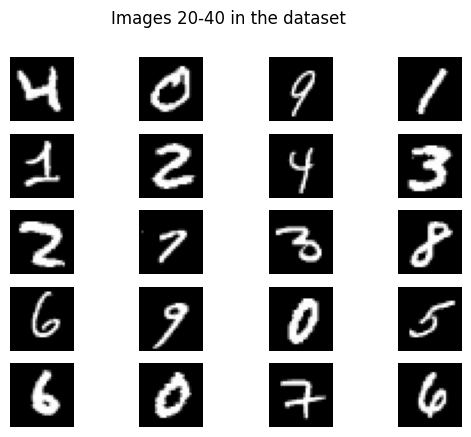

In [5]:
# show the first 20 images in the dataset in a 5x4 gird
fig = plt.figure()
for n in range(20, 40):
    ax = fig.add_subplot(5, 4, n - 19)
    plt.imshow(X_train[n], cmap='gray')   
    plt.axis('off')
fig.suptitle('Images 20-40 in the dataset')

# print the labels of the first 16 images in the dataset
print('Labels of the first 16 images in the dataset:')
print(y_train[20:40])

Before converting to float32 and normalizing the images by scaling pixel intensities to the range 0,1

In [ ]:
X_train[20]

# Data preprocessing

The next step is to preprocess the data, i.e. prepare it in a format that will make it easy to train and evaluate machine learning models such as neural networks. The MNIST dataset already is split into a training and validation sets, however, we will also require a validation set to monitor for overfitting (and perform model selection). 

spliting the training set into a new training set and a validation set using the train_test_split() function from Scikit-learn. The validation set contains 10% of the original training set, selected randomly using a seed value of 101 for reproducibility. The X variables contain the image data, while the y variables contain the corresponding labels.

In [7]:
# derive a validation set from the training set
# the original training set is split into 
# new training set (90%) and a validation set (10%)
X_train, X_val = train_test_split(X_train, test_size=0.10, random_state=101)
y_train, y_val = train_test_split(y_train, test_size=0.10, random_state=101)


print('Dimensionality of the new training image dataset and labels:')
print(X_train.shape)
print(y_train.shape)

print('Dimensionality of the validation image dataset and labels:')
print(X_val.shape)
print(y_val.shape)

print('Dimensionality of the new test image dataset and labels:')

print(X_test.shape)
print(y_test.shape)

Dimensionality of the new training image dataset and labels:
(54000, 28, 28)
(54000,)
Dimensionality of the validation image dataset and labels:
(6000, 28, 28)
(6000,)
Dimensionality of the new test image dataset and labels:
(10000, 28, 28)
(10000,)


Plotting the distribution of the class labels in the new training and validation sets to see if they are similaly distributed.
The hist() function in Matplotlib creates a histogram of the label counts for each digit class and displays it on a bar graph.



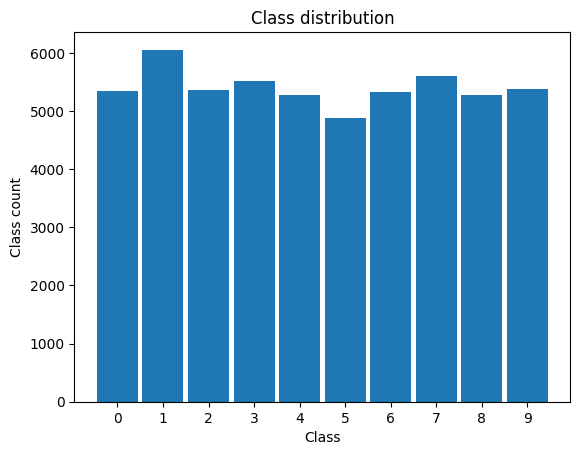

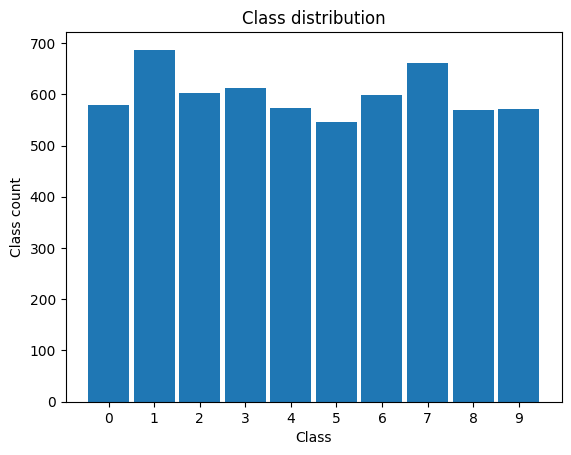

In [8]:
def plt_classes(y, num_class=10):
    plt.figure()
    plt.hist(y, bins=range(0,num_class+1), align='left', rwidth=0.9)
    plt.xlabel('Class')
    plt.ylabel('Class count')
    plt.xticks(range(0,num_class))
    plt.title('Class distribution')

    
# show the class label distribution in the training dataset
plt_classes(y_train)

# show the class label distribution in the validation dataset
plt_classes(y_val)

The following lines of code reshape the MNIST dataset to the appropriate format, convert the dataset to float32 data type (from uint8) and finally normalize to the intensity values to the [0, 1] range and create a validation set.


In the code "X_train = np.reshape(X_train, (-1,28,28,1))", the function np.reshape() is used to reshape the training data.

The first argument of np.reshape() is the input array, which in this case is X_train. The second argument (-1,28,28,1) specifies the new shape of the array - this means that we want to reshape the X_train array into a 4D array with dimensions (-1,28,28,1). The "-1" in this case indicates that the length of the first dimension (the batch size) should be automatically determined based on the size of the input data and the remaining dimensions.

In other words, this line of code converts the input images from a 2D array of shape (N, 784) to a 4D tensor of shape (N, 28, 28, 1), where N is the number of training examples, and 28x28 is the image size, and 1 represents the number of channels (in this case, it's grayscale, so there's only one channel). This is the expected input shape for a convolutional neural network in Keras.

In [9]:
# the shape of the data matrix is NxHxW, where
# N is the number of images,
# H and W are the height and width of the images
# keras expect the data to have shape NxHxWxC, where
# C is the channel dimension
X_train = np.reshape(X_train, (-1,28,28,1)) 
X_val = np.reshape(X_val, (-1,28,28,1))
X_test = np.reshape(X_test, (-1,28,28,1))


# convert the datatype to float32
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')


# normalize our data values to the range [0,1]
X_train /= 255
X_val /= 255
X_test /= 255

After converting to float32 and nomalizing the images

In [ ]:
X_train[20]

The MNIST classification problem has 10 classes, one for each digit. Thus, the output neural network should have 10 output neurons, each one corresponding to one of the classes. This means that the targets that will be used to train the network must be 10-dimensional vectors so they are directly comparable to the output neurons. This can be achieved by one-hot encoding of the class labels, which is performed in the code below.

In [60]:
# class label preprocessing for keras

# we see that we have a 1D-array with length 54000
print(y_train.shape) 


# since we have 10 different classes, what does this array look like?
# let's look at the first 10 labels
print(y_train[:10]) 


# convert 1D class arrays to 10D class matrices
#These lines one-hot encode the label data using the to_categorical() function in Keras. This creates a binary 
#matrix for each label where each row corresponds to a digit and the value of the column for that digit is 1 if it is 
#the correct label and 0 otherwise. This is necessary for training a neural network to predict multiple classes.
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)


# check the output
print(y_train.shape)
# this is now a one-hot encoded matrix
print(y_train[:10])

(60000,)
[5 0 4 1 9 2 1 3 1 4]
(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# Creating the Model

This is a function  for building a sequential neural network with a specified number of hidden layers and neurons per layer. The input layer consists of a Flatten layer that flattens the 28x28 image into a 784-dimensional vector or (converts them to 1D). The hidden layers consist of Dense layers with the ReLU activation function, which applies a threshold at zero to eliminate negative values and passes positive values through as-is. The output layer consists of another Dense layer with the softmax activation function, which converts the output into a probability distribution over the 10 digits. The optimizer is stochastic gradient descent (SGD), which updates the weights and biases after each batch of examples to move them towards the optimal values. The loss function is categorical cross-entropy, which measures the "distance" between the predicted and actual probability distributions, and the accuracy metric measures the percentage of correctly predicted labels.


The ReLU function is one of the most popular activation functions. It stands for “rectified linear unit”. Mathematically this function is defined as: y = max(0,x)The ReLU function returns “0” if the input is negative and is linear if the input is positive.

The softmax function is another activation function. It changes input values into values that reach from 0 to 1.

In [22]:
def build_model(num_hidden_layers, num_units):
    model = Sequential()
    model.add(Flatten(input_shape=(28,28,1))) 
    for i in range(num_hidden_layers):
        model.add(Dense(num_units, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
    # create a way to monitor our model in Tensorboard
tensorboard = TensorBoard("logs/{}".format(model_2))
tensorboard = TensorBoard("logs/{}".format(model_3))
tensorboard = TensorBoard("logs/{}".format(model_4))

Here we create three different models with varying numbers of hidden layers and neurons, and train each model on the training and validation sets using the fit() method. The validation_data parameter specifies the validation set to use during training. The epochs parameter specifies the number of times to iterate over the entire dataset, and the batch_size parameter specifies the number of examples per batch to use during each iteration. The history of each model's loss and accuracy during training is stored in respective variables.

**Model_2: Default neural network (1 HL, 128 and 10 neurons)** \\
**Model_3: Neural network with 2 HL, 128,128 and 10 neurons resp.** \\
**Model_4: Neural network with 3 HL, 512, 512, 512 and 10 neurons resp.**


In [23]:
model_2 = build_model(1, 128)
model_3 = build_model(2, 128)
model_4 = build_model(3, 512)


# Compiling and Training the Model

In [24]:
# Train the model
history_2 = model_2.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=[tensorboard])
history_3 = model_3.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=[tensorboard])
history_4 = model_4.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_val, y_val), callbacks=[tensorboard])


Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.6580 - accuracy: 0.8367 - val_loss: 0.4067 - val_accuracy: 0.8870
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3404 - accuracy: 0.9056 - val_loss: 0.3312 - val_accuracy: 0.9045
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2909 - accuracy: 0.9194 - val_loss: 0.2952 - val_accuracy: 0.9153
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2604 - accuracy: 0.9274 - val_loss: 0.2704 - val_accuracy: 0.9250
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2373 - accuracy: 0.9342 - val_loss: 0.2490 - val_accuracy: 0.9317
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2186 - accuracy: 0.9395 - val_loss: 0.2324 - val_accuracy: 0.9352
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2032 - accuracy: 0.9446 - val_loss: 0.2178 - val_accuracy:

# Evaluating the model

Here we evaluate the performance of each model on the test set using the evaluate() method. The verbose parameter specifies whether to print progress updates during evaluation. The score variables contain the loss and accuracy metrics for each model on the test set.

In [26]:
score_2 = model_2.evaluate(X_test, y_test, verbose=0)
score_3 = model_3.evaluate(X_test, y_test, verbose=0)
score_4 = model_4.evaluate(X_test, y_test, verbose=0)

print("Model with 2 hidden layers -- Loss: ",score_2[0], " Accuracy: ",score_2[1])
print("Model with 3 hidden layers -- Loss: ",score_3[0], " Accuracy: ",score_3[1])
print("Model with 4 hidden layers -- Loss: ",score_4[0], " Accuracy: ",score_4[1])

Model with 2 hidden layers -- Loss:  0.16466687619686127  Accuracy:  0.9524999856948853
Model with 3 hidden layers -- Loss:  0.1283307671546936  Accuracy:  0.9613999724388123
Model with 4 hidden layers -- Loss:  0.08771957457065582  Accuracy:  0.9733999967575073


1 hidden layers -- Loss:  0.16466687619686127    Accuracy:  0.9524999856948853 \\

2 hidden layers -- Loss:  0.1283307671546936    Accuracy:  0.9613999724388123 \\

3 hidden layers -- Loss:  0.08771957457065582    Accuracy:  0.9733999967575073 \\

# Making Prediction on New Data

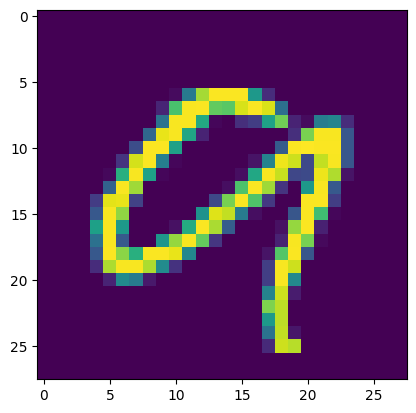

In [27]:
# Picking a random image to test the models
i=random.randint(0,9999)
plt.imshow(X_test[i])
plt.show()

In [30]:
#we use predict() on new data
predicted_value=model_2.predict(X_test)
predicted_value_one=model_3.predict(X_test)
predicted_value_two=model_4.predict(X_test)

print("Handwritten number in the image is = %d" %np.argmax(predicted_value[i]))
print("Handwritten number in the image is = %d" %np.argmax(predicted_value_one[i]))
print("Handwritten number in the image is = %d" %np.argmax(predicted_value_two[i]))

313/313 [==============================] - 1s 4ms/step
Handwritten number in the image is = 9
Handwritten number in the image is = 9
Handwritten number in the image is = 9


# Plot graph for Accuracy and Loss

313/313 [==============================] - 2s 7ms/step


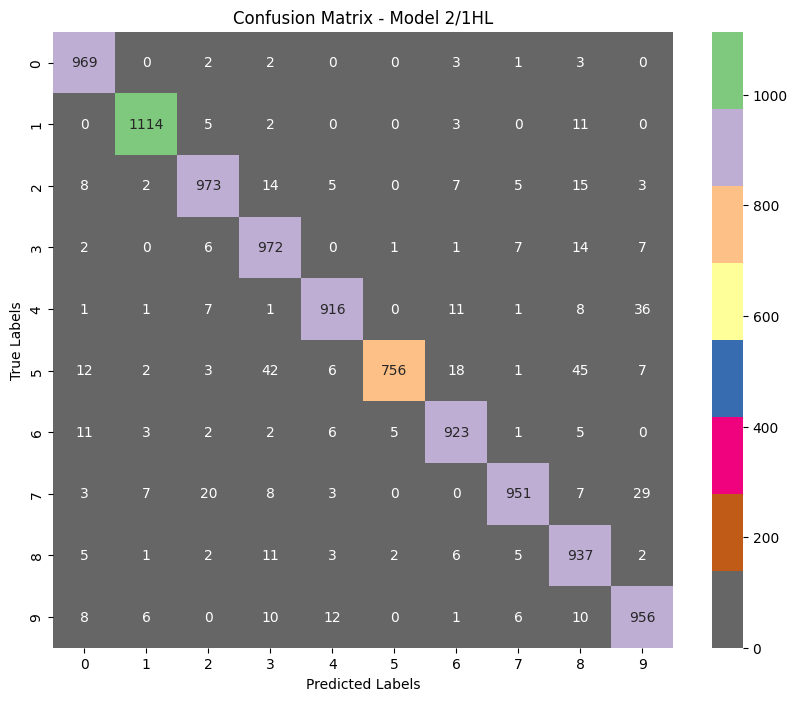

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Predict the class labels for each test example using all three models
y_pred_2 = np.argmax(model_2.predict(X_test), axis=-1)
y_pred_3 = np.argmax(model_3.predict(X_test), axis=-1)
y_pred_4 = np.argmax(model_4.predict(X_test), axis=-1)

# Compute the confusion matrices for all three models
cm_2 = confusion_matrix(np.argmax(y_test, axis=-1), y_pred_2)
cm_3 = confusion_matrix(np.argmax(y_test, axis=-1), y_pred_3)
cm_4 = confusion_matrix(np.argmax(y_test, axis=-1), y_pred_4)



# plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_2, annot=True, cmap='Accent_r', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Model 2/1HL')
plt.show()


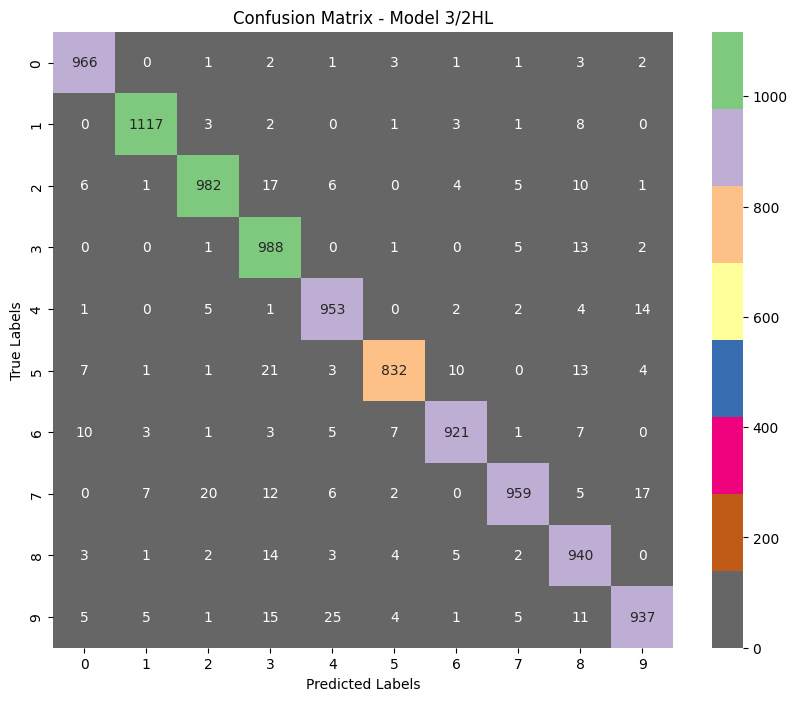

In [64]:
# plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_3, annot=True, cmap='Accent_r', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Model 3/2HL')
plt.show()


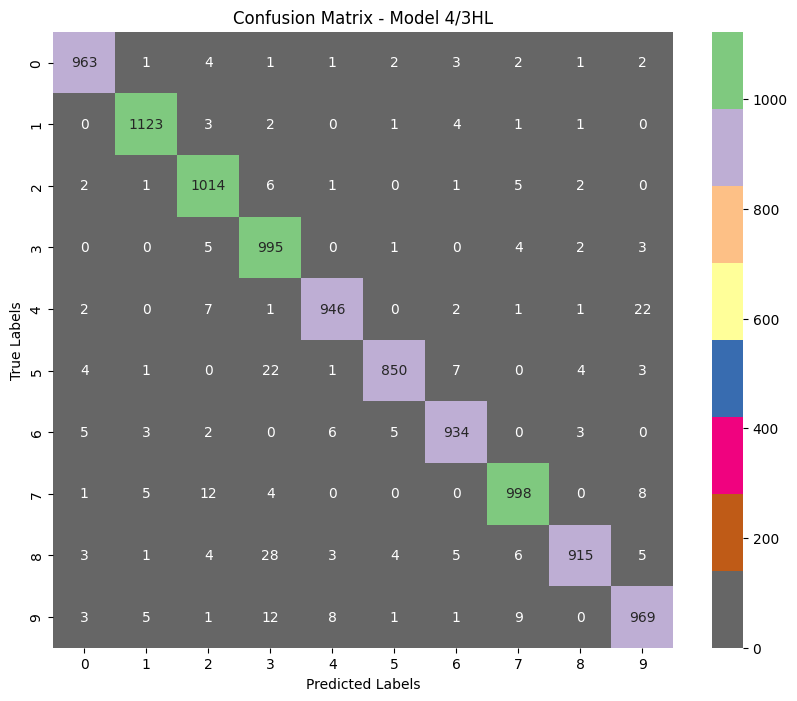

In [66]:
# plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_4, annot=True, cmap='Accent_r', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Model 4/3HL')
plt.show()


In [32]:
history_2.history.keys()
history_3.history.keys()
history_4.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

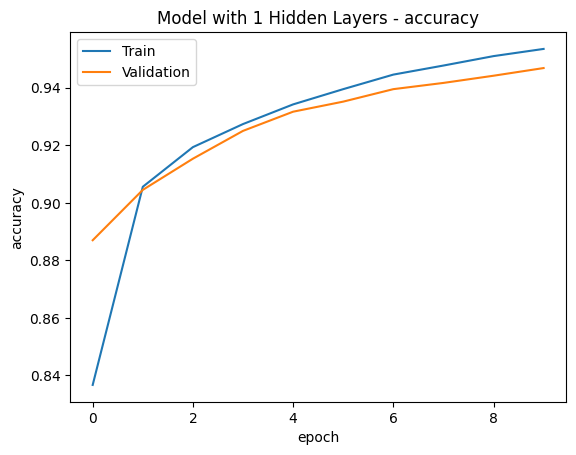

In [75]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model with 1 Hidden Layers - accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

graph representing the model’s loss

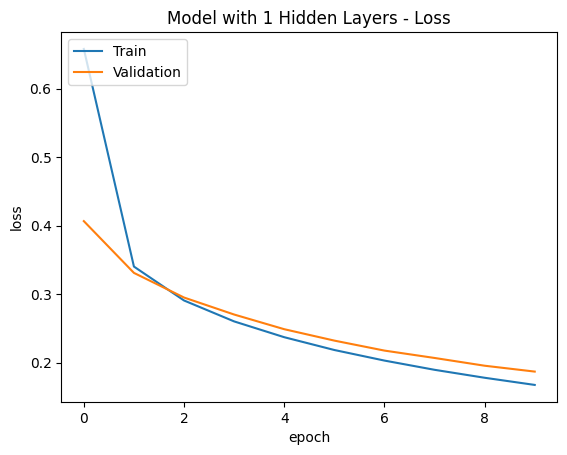

In [74]:
# Plot the training and validation loss for all three models
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model with 1 Hidden Layers - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

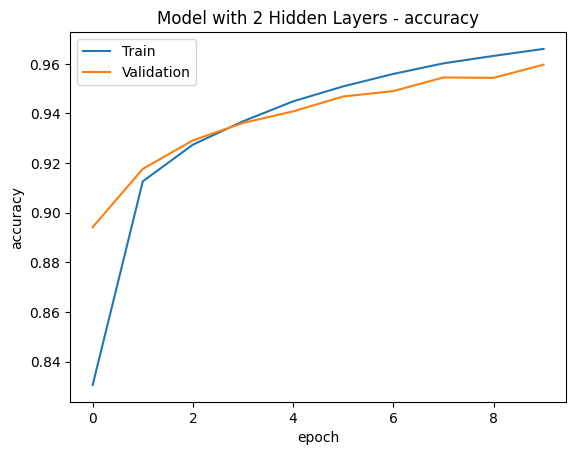

In [73]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model with 2 Hidden Layers - accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

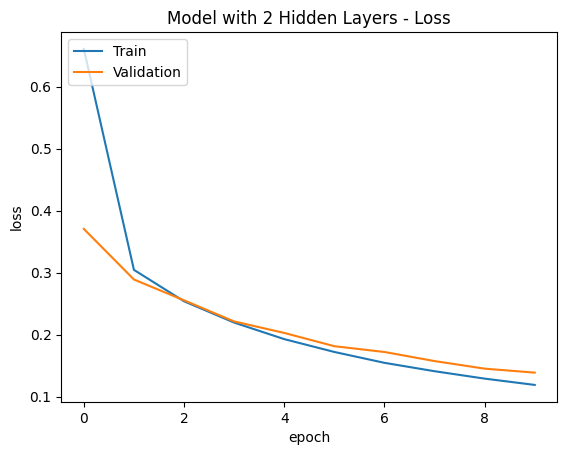

In [72]:
# Plot the training and validation loss for all three models
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model with 2 Hidden Layers - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

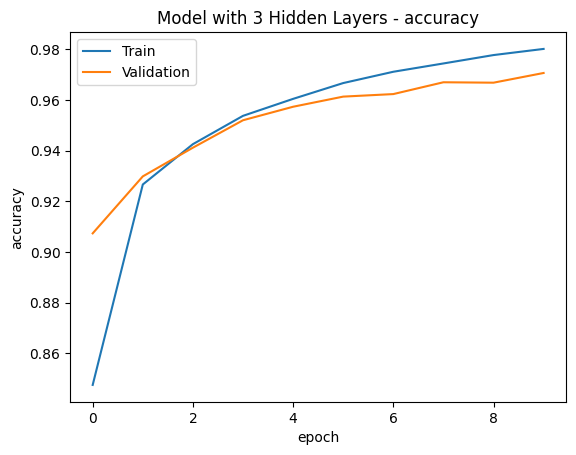

In [71]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model with 3 Hidden Layers - accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

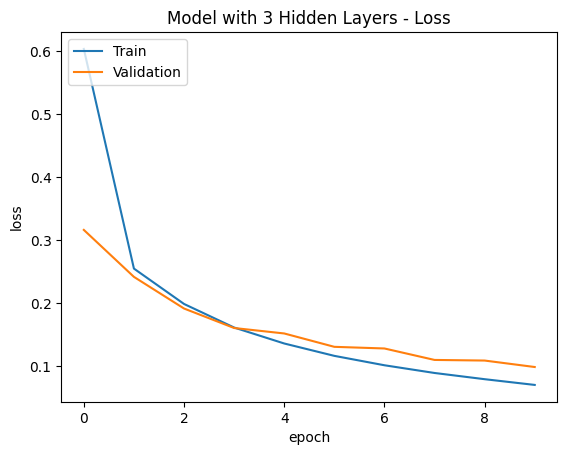

In [70]:
# Plot the training and validation loss for all three models
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model with 3 Hidden Layers - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

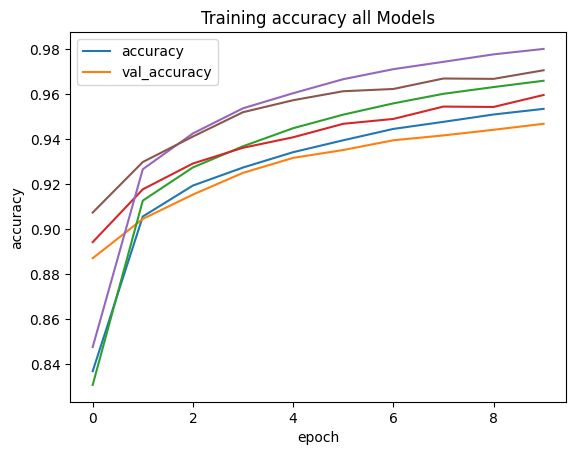

In [69]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Training accuracy all Models')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

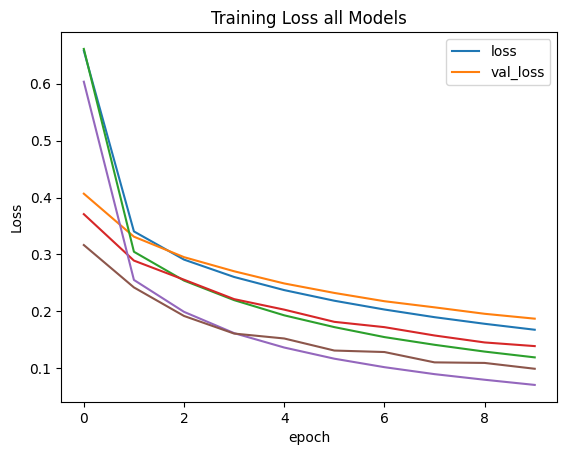

In [68]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Training Loss all Models')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'])
plt.show()


**This code loads the MNIST dataset and preprocesses the data by splitting it into a training, validation, and test set, reshaping it, normalizing the pixel values, and converting the class labels to one-hot encoded vectors. It also defines**